In [58]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
env_term_file = '../data/small_term_based_green_rating_results.csv'

In [3]:
#small data reading
rrr_data = pd.read_csv('../data/small_restaurants_reviews_ratings.csv')
rrr_data.head()

,Unnamed: 0,name,review_text,stars,GRA_rating,seafood_rating,term_based_rating,overall_rating
0,8569,MCDONALD'S,"[""Probably the worst McDonalds ever. I go here...",1.5,1.0,0.0,2,3.0
1,5715,MCDONALD'S,"[""Went to Canonsburg McDonald's for breakfast ...",3.0,1.0,0.0,2,3.0
2,13166,POPEYES LOUISIANA KITCHEN,"[""I was cave'n Popeyes since I seen it this m...",3.0,0.0,0.0,3,3.0
3,18287,POPEYES LOUISIANA KITCHEN,"[""Well I'm a Popeyes big fan \n\nThis time i g...",2.0,0.0,0.0,3,3.0
4,7832,MCDONALD'S,"[""If I could give zero stars I would. I ordere...",1.0,1.0,0.0,2,3.0


In [4]:
big_rrr_data = pd.read_csv('../data/big_restaurants_reviews_ratings.csv')
big_rrr_data.shape

(77331, 9)

In [14]:
rrr_data[['stars', 'GRA_rating', 'seafood_rating', 'term_based_rating', 'overall_rating']].apply(pd.Series.value_counts)


,stars,GRA_rating,seafood_rating,term_based_rating,overall_rating
0.0,NaN,17179.0,19140.0,11751.0,10211.0
1.0,605.0,1977.0,16.0,7179.0,8310.0
1.5,1110.0,NaN,NaN,NaN,NaN
2.0,3015.0,NaN,NaN,214.0,579.0
2.5,3874.0,NaN,NaN,NaN,NaN
3.0,3807.0,NaN,NaN,12.0,56.0
3.5,2806.0,NaN,NaN,NaN,NaN
4.0,2567.0,NaN,NaN,NaN,NaN
4.5,1167.0,NaN,NaN,NaN,NaN
5.0,205.0,NaN,NaN,NaN,NaN


In [15]:
rrr_data.shape

(19156, 8)

In [16]:
yelp_data = pd.read_csv('../data/small_restaurants_and_reviews.csv')
yelp_data.shape

(5000, 13)

In [17]:
# Add in the GRA data
green = pd.read_csv('../data/clean_green.csv', header=0, delimiter=',')
green = green.sort_values(['Name'])
green = green[['Name', 'rating']]

green.rename(columns={"Name": "name", "rating": "GRA_rating"}, inplace=True)


In [18]:
green.shape

(573, 2)

In [19]:
# Add in the Seafood Watch Data
seafood = pd.read_csv('../data/original_sources/SeafoodWatch.csv')
seafood_restaurants = seafood.loc[seafood['PartnerTypes'] == 'Restaurant Partner']


def clean_str(r):
    idx = r.find('(')
    if idx != -1:
        return r[0:idx]
    else:
        return r


seafood = pd.DataFrame(seafood_restaurants['Title'].apply(lambda r: clean_str(r)).unique())
seafood.rename(index=str, columns={0: 'name'}, inplace=True)
seafood['rating'] = 1
seafood = seafood[['name', 'rating']]
seafood['name'] = seafood['name'].str.upper()
seafood.rename(columns={"rating": "seafood_rating"}, inplace=True)


In [20]:
seafood.shape

(168, 2)

In [21]:
env_terms = pd.read_csv(env_term_file, header=0, delimiter=',')
env_terms.rename(columns={"term_based_green_rating": "term_based_rating"}, inplace=True)

In [22]:
env_terms.shape

(5000, 2)

In [35]:
summary = big_rrr_data[['stars', 'GRA_rating', 'seafood_rating', 'term_based_rating', 'overall_rating']].apply(pd.Series.value_counts)


In [26]:
big_rrr_data.groupby(['GRA_rating','stars']).count()[['name']]

name
GRA_rating stars       
0.0        1.0      486
           1.5     1363
           2.0     4056
           2.5     7533
           3.0    13278
           3.5    17727
           4.0    18443
           4.5    10396
           5.0     3093
1.0        1.0       76
           1.5      214
           2.0      272
           2.5      171
           3.0      128
           3.5       50
           4.0       28
           4.5        6
           5.0        1
2.0        3.5        1
           4.5        1
3.0        3.0        2
           3.5        2
           4.0        4

In [27]:
big_rrr_data.groupby(['stars', 'GRA_rating']).count()[['name']]

name
stars GRA_rating       
1.0   0.0           486
      1.0            76
1.5   0.0          1363
      1.0           214
2.0   0.0          4056
      1.0           272
2.5   0.0          7533
      1.0           171
3.0   0.0         13278
      1.0           128
      3.0             2
3.5   0.0         17727
      1.0            50
      2.0             1
      3.0             2
4.0   0.0         18443
      1.0            28
      3.0             4
4.5   0.0         10396
      1.0             6
      2.0             1
5.0   0.0          3093
      1.0             1

## Visualizing the Results

In [59]:
data = big_rrr_data.groupby(['stars', 'overall_rating']).count()[['name']]

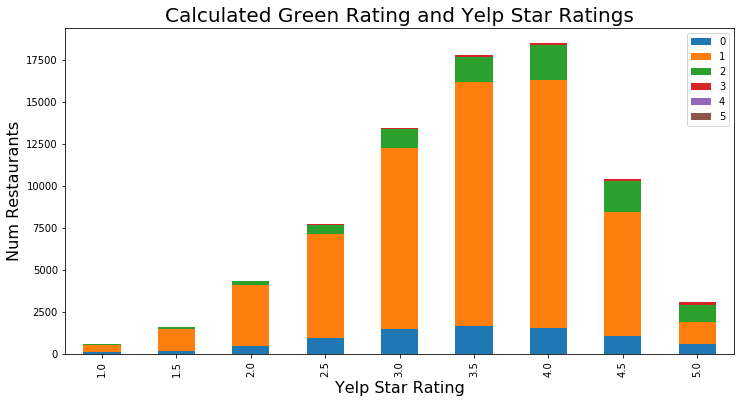

In [73]:
data.unstack().plot(kind='bar',figsize=(12, 6), stacked=True)
plt.xlabel('Yelp Star Rating', fontsize=16)
plt.ylabel('Num Restaurants', fontsize=16)
plt.title('Calculated Green Rating and Yelp Star Ratings',fontsize=20)
plt.legend(labels=('0', '1', '2', '3', '4', '5'))
plt.show()

In [67]:
data.unstack()

name                                  
overall_rating     0.0      1.0     2.0    3.0  4.0  5.0
stars                                                   
1.0               86.0    429.0    44.0    3.0  NaN  NaN
1.5              148.0   1318.0   107.0    4.0  NaN  NaN
2.0              468.0   3595.0   257.0    8.0  NaN  NaN
2.5              933.0   6183.0   558.0   30.0  NaN  NaN
3.0             1462.0  10793.0  1112.0   39.0  2.0  NaN
3.5             1624.0  14531.0  1518.0  105.0  1.0  1.0
4.0             1510.0  14780.0  2049.0  132.0  3.0  1.0
4.5             1070.0   7383.0  1797.0  153.0  NaN  NaN
5.0              607.0   1286.0   993.0  208.0  NaN  NaN

In [84]:
big_rrr_data.drop(columns=["Unnamed: 0"], inplace=True)

In [85]:
big_rrr_data.corr()

,stars,GRA_rating,seafood_rating,term_based_rating,overall_rating
stars,1.000000,-0.167059,-0.009802,0.148922,0.112615
GRA_rating,-0.167059,1.000000,-0.002935,-0.196870,0.029731
seafood_rating,-0.009802,-0.002935,1.000000,-0.000605,0.052337
term_based_rating,0.148922,-0.196870,-0.000605,1.000000,0.972732
overall_rating,0.112615,0.029731,0.052337,0.972732,1.000000
